# A Journey Through Titanic - Linear Regression

I will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

I'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

I'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data
Let's start by reading the titanic_train.csv file into a pandas dataframe.

In [3]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Let's get some information before data engineering!

In [5]:
train.info()
print('====================================')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

## Missing Data
Now I'll use seaborn to create a simple handy heatmap to show us where we are missing data!

In [34]:
print("Number of NaN cells in each columns:")
print("=================================")
train.isnull().sum()

Number of NaN cells in each columns:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

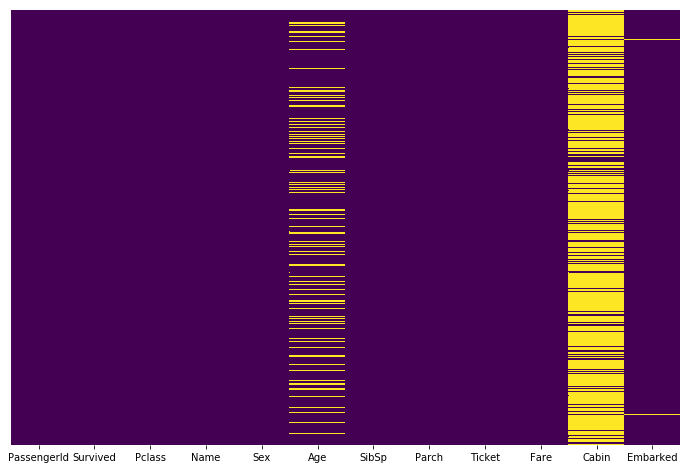

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

Roughly, as we can see, 177 values of the `Age` data is missing. The proportion of `Age` missing is likely small enough for reasonable replacement with some form of imputation. Looking at the `Cabin` column, if looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

**Let's continue on our visualization:**

### Number of People Survived

In [28]:
NumOfSur = train['Survived'].value_counts()[1]
NumOfNotSur = train['Survived'].value_counts()[0]

print("Number of People Survived: ", NumOfSur)
print("Number of People Not Survived: ", NumOfNotSur)

Number of People Survived:  342
Number of People Not Survived:  549


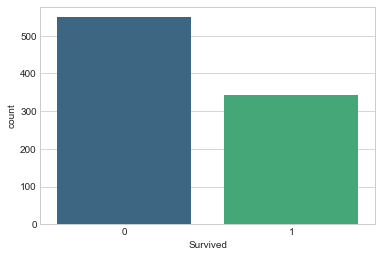

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='viridis')

### Number of People Survived & Not Survived in each gender

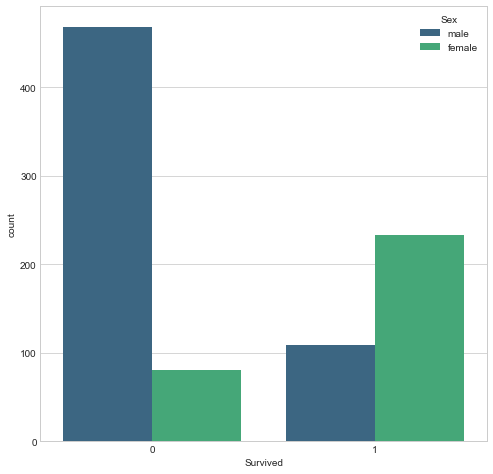

In [35]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Survived', data=train, hue='Sex', palette='viridis')

### Number of People Survived & Not Survived in each Class

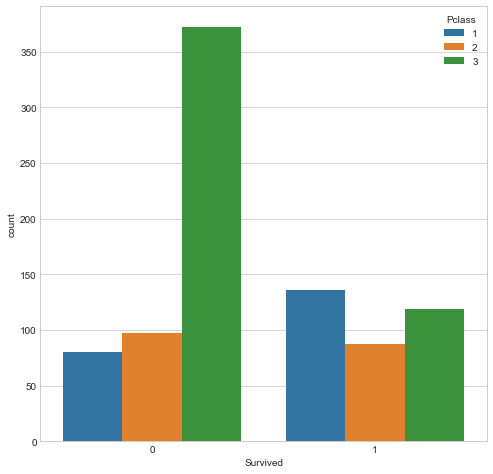

In [37]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Survived', data=train, hue='Pclass')

### Distribution of `Age` column:

/home/mosaab/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


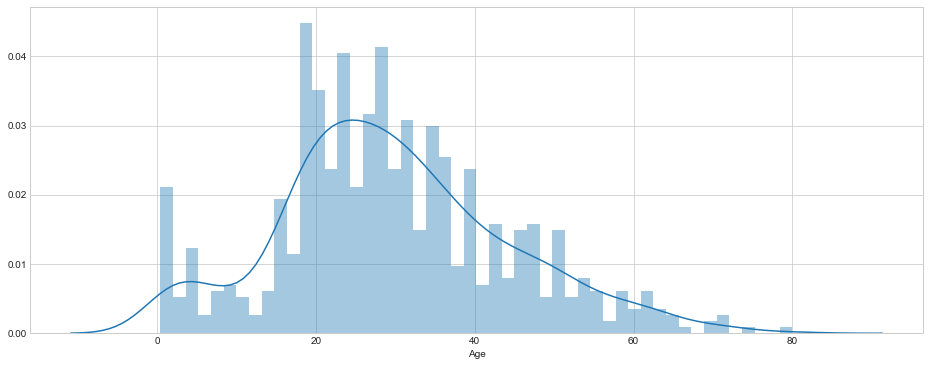

In [54]:
plt.figure(figsize=(16, 6))
sns.distplot(train['Age'].dropna(), bins=50)

### How many people came alone?

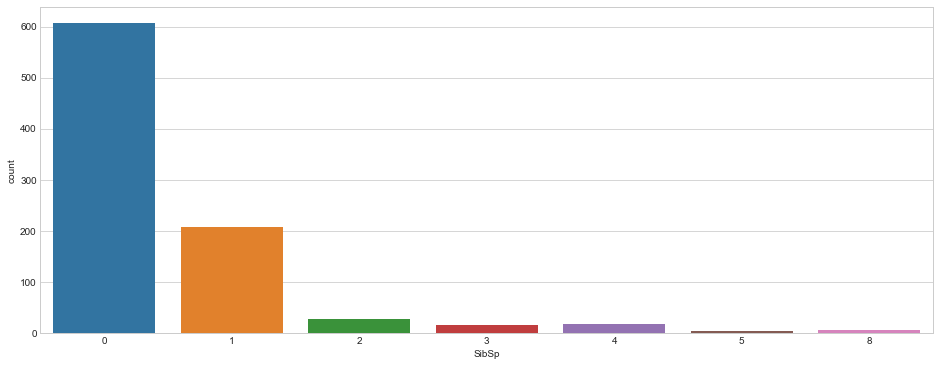

In [55]:
plt.figure(figsize=(16, 6))
sns.countplot(x='SibSp', data=train)

### What is the range of average price that people paid?

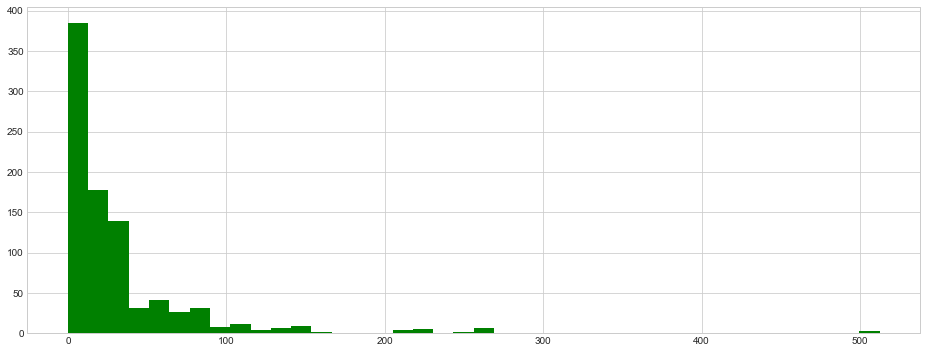

In [64]:
train['Fare'].hist(color='green', bins=40, figsize=(16, 6))

In [65]:
import cufflinks as cf
cf.go_offline()

In [66]:
train['Fare'].iplot(kind='hist', bins=30, color='green')

## Data Cleaning
- We want to fill in missing age data instead of just dropping the missing age data rows.
- We're going to do this by filling the mean age of all the passenger (imputatoin). However we can be smarter about this and check the average age by passenger class.

Mean of Age for Class (1):  38.0
Mean of Age for Class (2):  29.0
Mean of Age for Class (3):  25.0


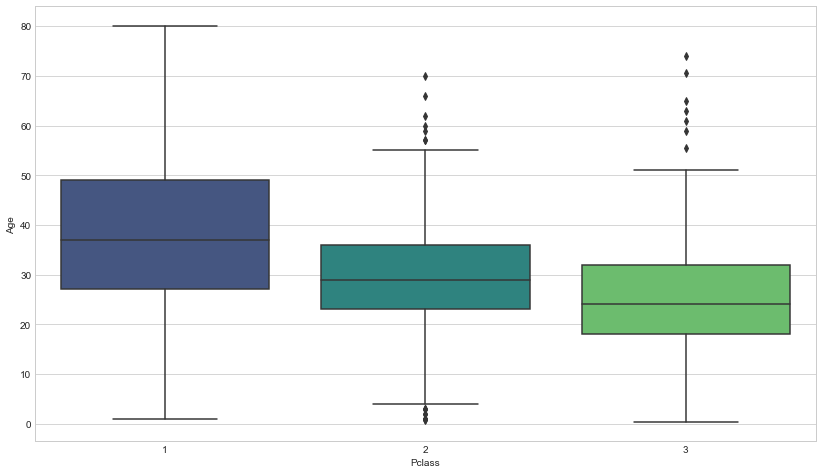

In [75]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Pclass', y='Age', data=train, palette='viridis')

mean1 = train[train['Pclass'] == 1]['Age'].mean()
mean2 = train[train['Pclass'] == 2]['Age'].mean()
mean3 = train[train['Pclass'] == 3]['Age'].mean()

print('Mean of Age for Class (1): ', mean1//1)
print('Mean of Age for Class (2): ', mean2//1)
print('Mean of Age for Class (3): ', mean3//1)

In [76]:
def impute_age(cols):
    meanClass = {1: 38, 2: 29, 3: 25}
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        return meanClass[Pclass]
    else:
        return Age

In [77]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [80]:
print('Number of (NaN) Values in Age: ', train.isnull().sum()['Age'])

Number of (NaN) Values in Age:  0


Great! Let's go ahead and drop the Cabin Column since it contains a lot of NaN values, and it doesn't really affect the survival that much.

In [81]:
train.drop('Cabin', axis=1, inplace=True)

In [83]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [85]:
train.dropna(inplace=True)

## Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [87]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [88]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Pclass'], axis=1, inplace=True)

In [89]:
train = pd.concat([train, sex, embark, pclass], axis=1)

In [95]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


Great! Out data is ready for our model!

## Building a Logistic Regression Model

Let's start by splitting our data into a training set and test set.

In [96]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived', axis=1), train['Survived'], test_size=0.3, random_state=101)

## Training and Predicting

In [100]:
from sklearn.linear_model import LogisticRegression

In [102]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
y_pred = lr.predict(X_test)

## Evaluation

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87       163
          1       0.85      0.67      0.75       104

avg / total       0.83      0.83      0.82       267



In [110]:
from sklearn.metrics import confusion_matrix

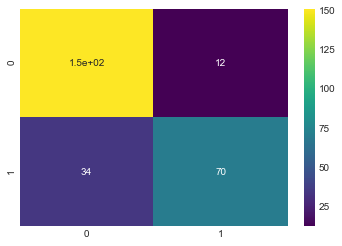

In [113]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='viridis', annot=True)